# <font color = red> <center> Credit EDA Case Study </center> </font>

### This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study

#### <font color = blue> Importing required libraries to perform analysis on Loan application data </font>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#### <font color = blue> Reading data from CSV files into python.

In [25]:
App_Data_DF = pd.read_csv("Input_File")
# Removing Columns,if they have all values as NA
for col in App_Data_DF:
    if(App_Data_DF[col].count()==0):
        App_Data_DF=App_Data_DF.drop(col,axis=1)
App_Data_DF.head(10)        

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


#### <font color = blue> Analysing entire data set to see the number of columns , rows data types etc..

In [3]:
App_Data_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [128]:
App_Data_DF.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


#### <font color = blue> Finding out the number of null values present in each column of our data set. 

In [6]:
df_c = pd.DataFrame()
df_r = pd.DataFrame()

In [7]:
df_c['Null percent'] = ((App_Data_DF.isnull().sum()/len(App_Data_DF))*100).sort_values(ascending = False)

In [8]:
df_c = df_c.loc[df_c['Null percent']< 13]

In [9]:
column_list = list(df_c.index)

#### <font color = blue> Dropping columns that have more than 13% of null values from the application data frame

In [10]:
App_Data_DF = App_Data_DF.loc[:,column_list]

#### <font color = blue> Checking for null values percentage in rows of the application data data frame.

In [135]:
df_r['Null percent'] = ((App_Data_DF.isnull().sum(axis = 1)/65)*100).sort_values(ascending = False)

In [136]:
df_r.head(15)

,Null percent
7220,7.692308
187180,7.692308
230854,7.692308
113944,7.692308
301702,6.153846
26686,6.153846
186326,6.153846
166502,6.153846
255456,6.153846
139622,6.153846


<font color = red> There was no need to drop any rows as the missing data is not huge in this case.

#### <font color = blue> Checking the data type of our application data frame.

In [362]:
App_Data_DF.dtypes

NAME_TYPE_SUITE                 object
OBS_30_CNT_SOCIAL_CIRCLE       float64
OBS_60_CNT_SOCIAL_CIRCLE       float64
DEF_60_CNT_SOCIAL_CIRCLE       float64
DEF_30_CNT_SOCIAL_CIRCLE       float64
EXT_SOURCE_2                   float64
AMT_GOODS_PRICE                float64
AMT_ANNUITY                    float64
CNT_FAM_MEMBERS                float64
DAYS_LAST_PHONE_CHANGE         float64
CODE_GENDER                     object
NAME_FAMILY_STATUS              object
REGION_RATING_CLIENT             int64
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
AMT_INCOME_TOTAL               float64
FLAG_OWN_REALTY                 object
FLAG_CONT_MOBILE                 int64
NAME_CONTRACT_TYPE              object
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
NAME_INCOME_TYPE         

### <font color = blue> Checking for outliers in the data frame

> ##### Annuity Amount

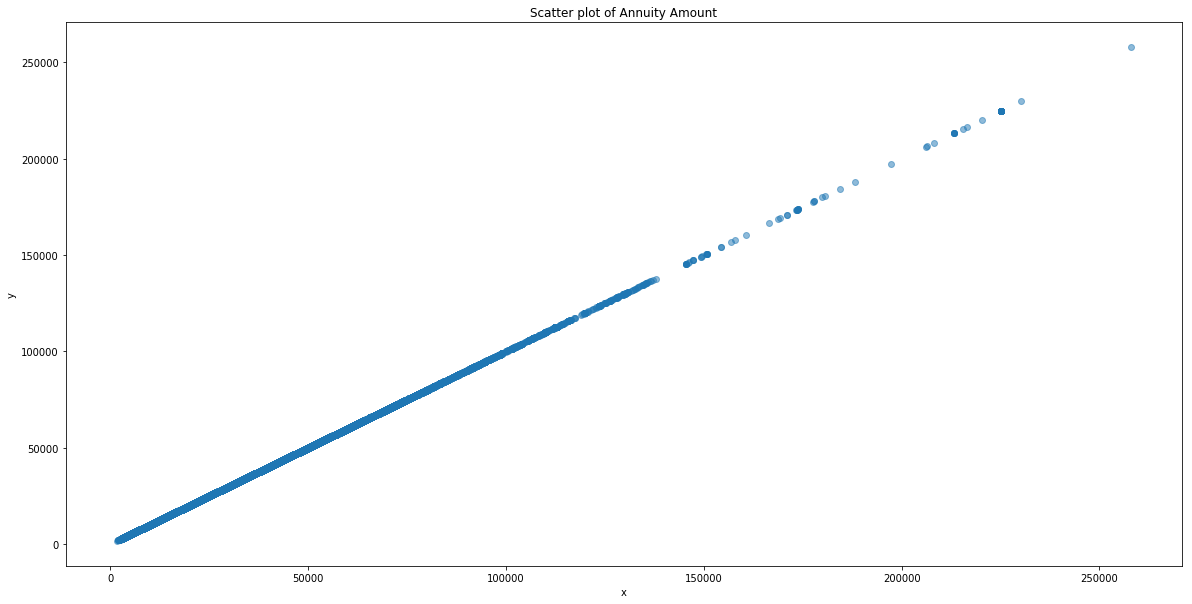

In [137]:
plt.figure(figsize=(20,10))
plt.scatter(App_Data_DF.AMT_ANNUITY, App_Data_DF.AMT_ANNUITY, alpha=0.5)
plt.title('Scatter plot of Annuity Amount')
plt.xlabel('x')
plt.ylabel('y')
plt.show()



We can see that the data till 150000 is continuous and from there till 250000 we have less records and we have clear outlier which is above 250000. We can either choose to split the data into sub groups and analyse or drop the outlier value and analyse.

In [138]:
App_Data_DF = App_Data_DF.loc[App_Data_DF['AMT_ANNUITY'] != max(App_Data_DF.AMT_ANNUITY)]

> ##### Annunity Amount after dropping outlier

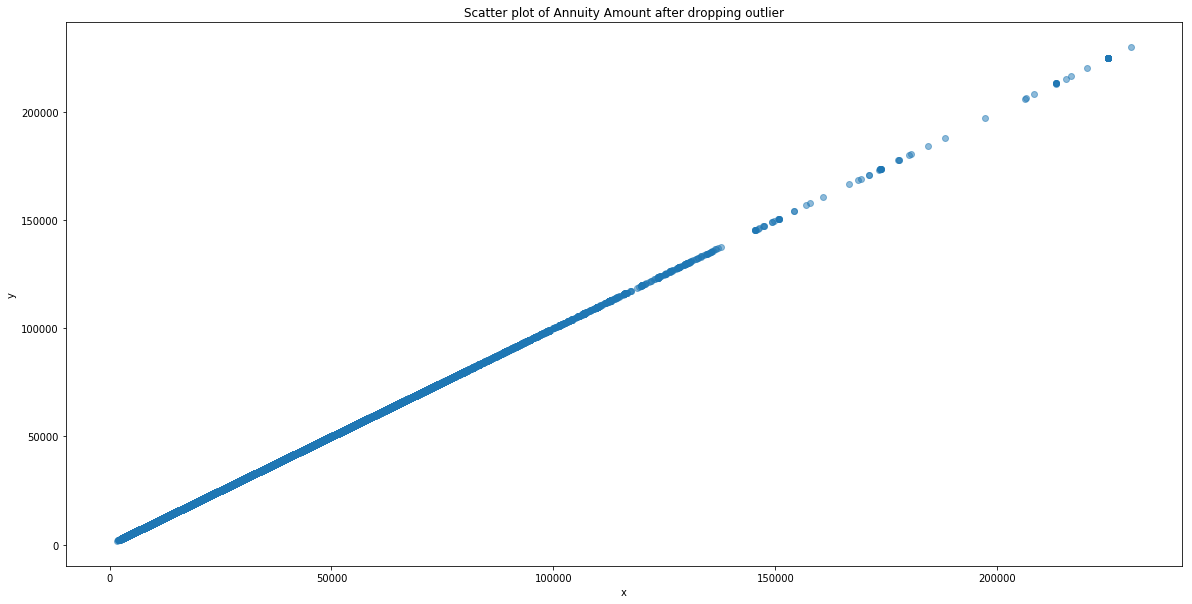

In [139]:
plt.figure(figsize=(20,10))
plt.scatter(App_Data_DF.AMT_ANNUITY, App_Data_DF.AMT_ANNUITY, alpha=0.5)
plt.title('Scatter plot of Annuity Amount after dropping outlier')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

The data is still not so evenly spread but we dont have any huge variations and outliers.

> #### Credit Amount

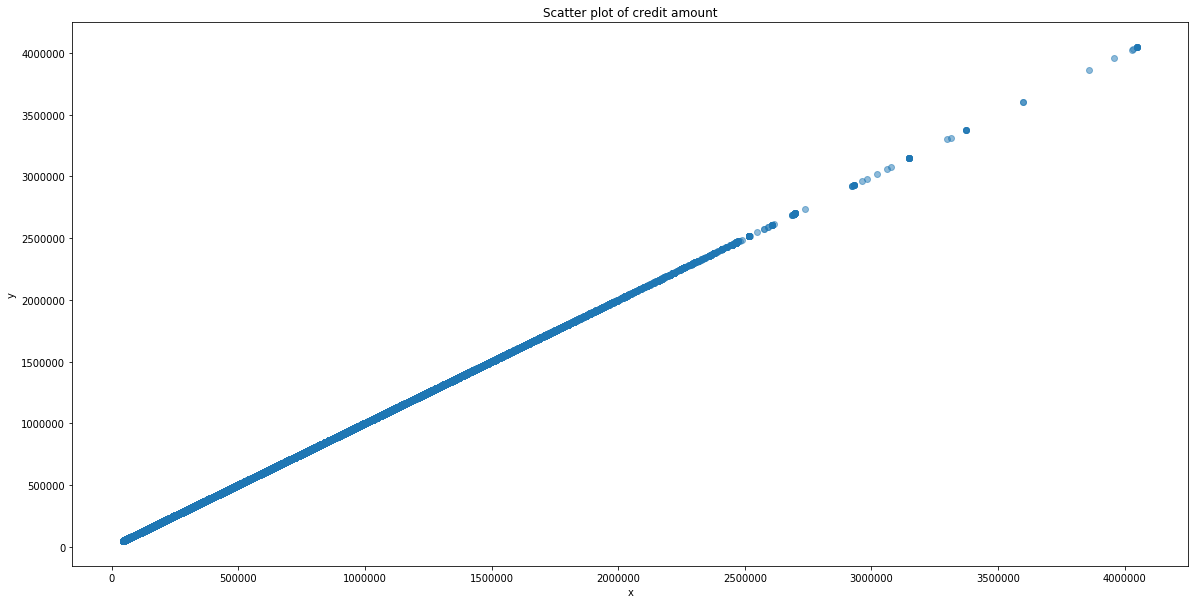

In [94]:
plt.figure(figsize=(20,10))
plt.scatter(App_Data_DF.AMT_CREDIT, App_Data_DF.AMT_CREDIT, alpha=0.5)
plt.title('Scatter plot of credit amount')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In credit amount we can clearly see some outliers but we cannot just drop one or two records but we need to put a cap on credit amount like at 2500000 lakhs. Or else we can split the amount into two sub groups and then analyse so that we have more unbiased results.unbiased 

> #### AMT_INCOME_TOTAL

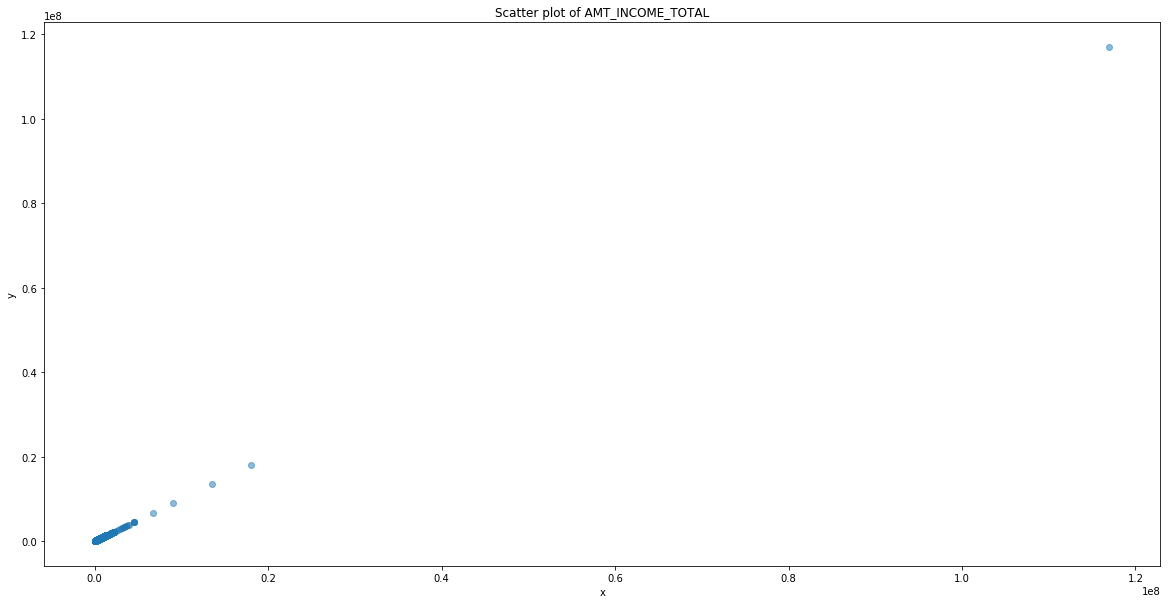

In [95]:
plt.figure(figsize=(20,10))
plt.scatter(App_Data_DF.AMT_INCOME_TOTAL, App_Data_DF.AMT_INCOME_TOTAL, alpha=0.5)
plt.title('Scatter plot of AMT_INCOME_TOTAL')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

We can see a very clear outlier in this case. The income of one customer is very very high 
compared to others in the data frame.

In [96]:
App_Data_DF = App_Data_DF.loc[App_Data_DF['AMT_INCOME_TOTAL'] != max(App_Data_DF.AMT_INCOME_TOTAL)]

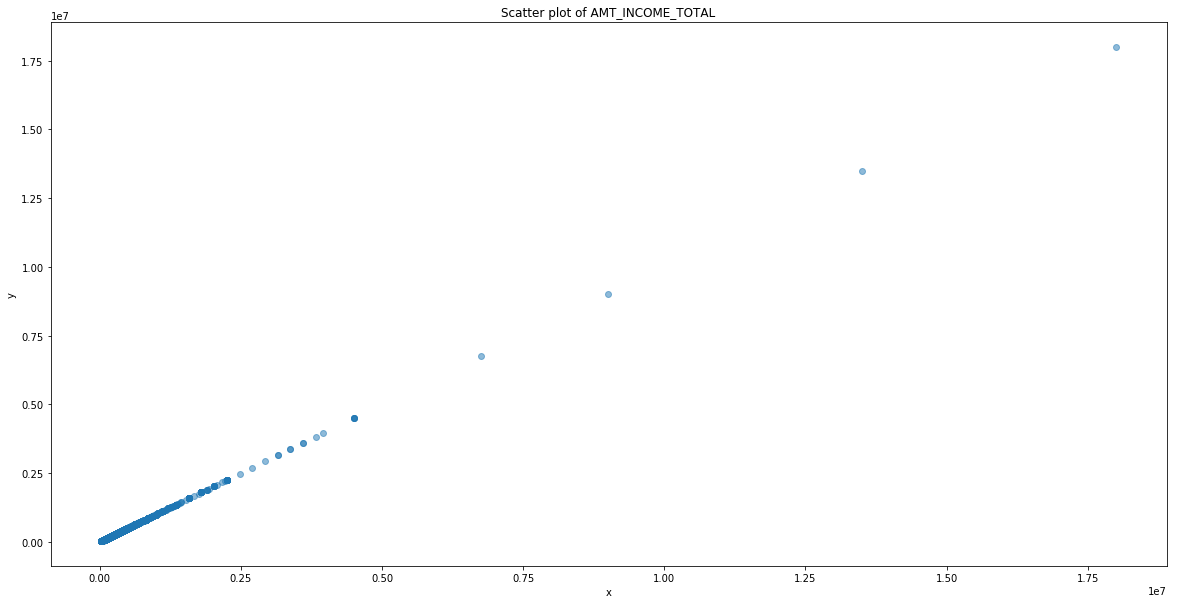

In [97]:
plt.figure(figsize=(20,10))
plt.scatter(App_Data_DF.AMT_INCOME_TOTAL, App_Data_DF.AMT_INCOME_TOTAL, alpha=0.5)
plt.title('Scatter plot of AMT_INCOME_TOTAL')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

We can still some outliers but it is not as drastic as previous outlier. But we can still remove 2-3 records to acheive better balance of data.

We need to delete 3-4 outlier to balance data

> #### REGION_POPULATION_RELATIVE

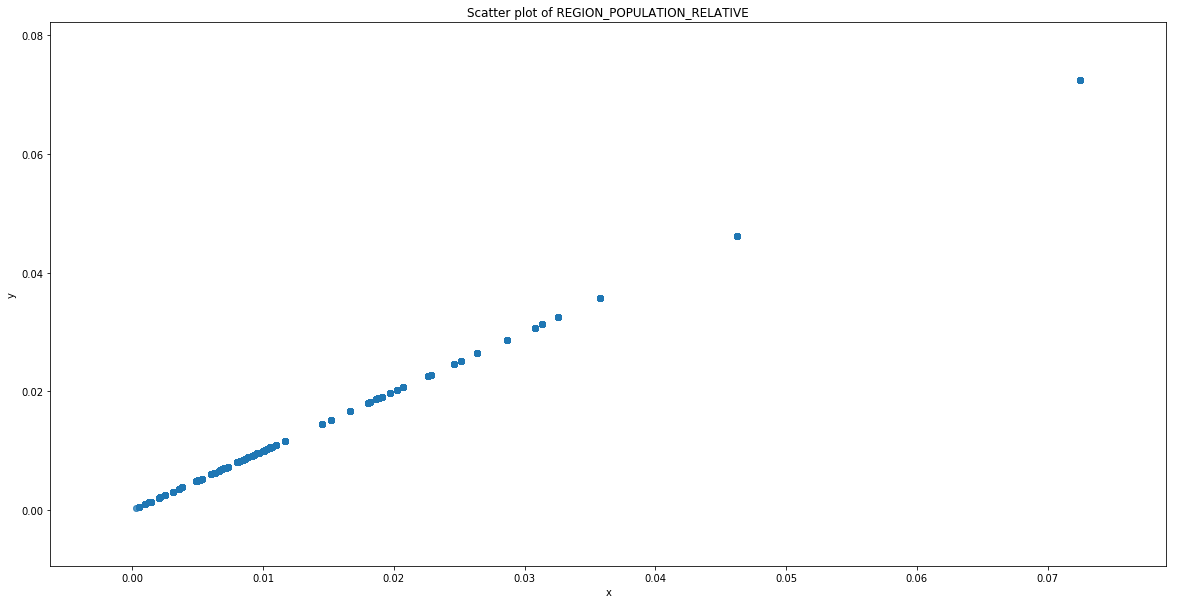

In [375]:
plt.figure(figsize=(20,10))
plt.scatter(App_Data_DF.REGION_POPULATION_RELATIVE, App_Data_DF.REGION_POPULATION_RELATIVE, alpha=0.5)
plt.title('Scatter plot of REGION_POPULATION_RELATIVE')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [101]:
App_Data_DF = App_Data_DF.loc[App_Data_DF['REGION_POPULATION_RELATIVE'] != max(App_Data_DF.REGION_POPULATION_RELATIVE)]

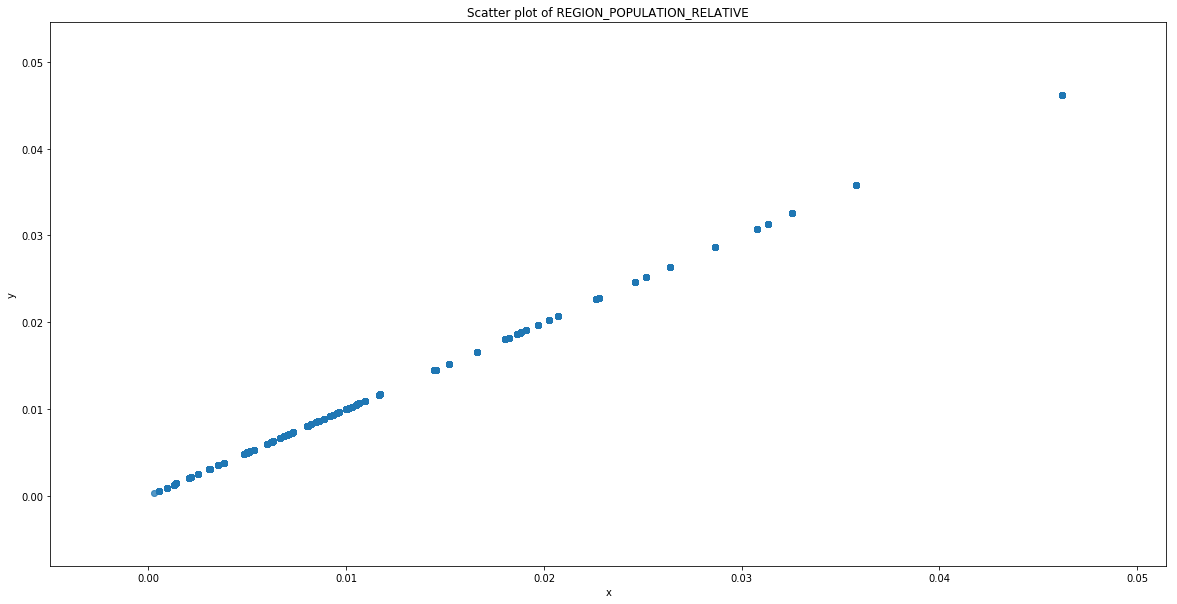

In [102]:
plt.figure(figsize=(20,10))
plt.scatter(App_Data_DF.REGION_POPULATION_RELATIVE, App_Data_DF.REGION_POPULATION_RELATIVE, alpha=0.5)
plt.title('Scatter plot of REGION_POPULATION_RELATIVE')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

After the outlier is removed we have much better balance of data

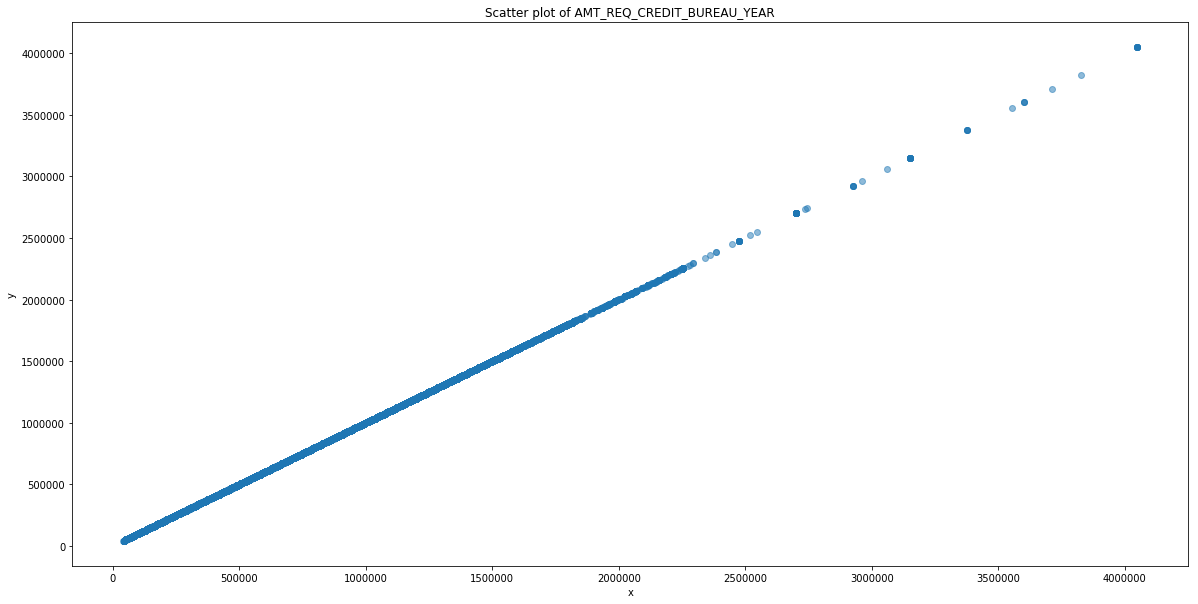

In [380]:
plt.figure(figsize=(20,10))
plt.scatter(App_Data_DF.AMT_GOODS_PRICE, App_Data_DF.AMT_GOODS_PRICE, alpha=0.5)
plt.title('Scatter plot of AMT_REQ_CREDIT_BUREAU_YEAR')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**Data seems consistent and there is no need to remove outlier in this case**

In [21]:
#Binning of Amount_Income_Total
bins_income=[0,100000,1000000,2000000,3000000,4000000,5000000]
labels=[0,1,2,3,4,5]

App_Data_DF['income']=pd.cut(App_Data_DF['AMT_INCOME_TOTAL'], bins=bins_income)
print(App_Data_DF['income'].head(20))

0     (100000, 1000000]
1     (100000, 1000000]
2           (0, 100000]
3     (100000, 1000000]
4     (100000, 1000000]
5           (0, 100000]
6     (100000, 1000000]
7     (100000, 1000000]
8     (100000, 1000000]
9     (100000, 1000000]
10    (100000, 1000000]
11          (0, 100000]
12          (0, 100000]
13    (100000, 1000000]
14    (100000, 1000000]
15    (100000, 1000000]
16    (100000, 1000000]
17          (0, 100000]
18    (100000, 1000000]
19          (0, 100000]
Name: income, dtype: category
Categories (6, interval[int64]): [(0, 100000] < (100000, 1000000] < (1000000, 2000000] < (2000000, 3000000] < (3000000, 4000000] < (4000000, 5000000]]


In [22]:
#Binning of Amount_Credit
bins_income=[0,100000,1000000,2000000,3000000,4000000,5000000]
labels=[0,1,2,3,4,5]

App_Data_DF['credit']=pd.cut(App_Data_DF['AMT_CREDIT'], bins=bins_income)
print(App_Data_DF['credit'].tail(20))

307491    (1000000, 2000000]
307492    (1000000, 2000000]
307493     (100000, 1000000]
307494     (100000, 1000000]
307495     (100000, 1000000]
307496     (100000, 1000000]
307497     (100000, 1000000]
307498    (1000000, 2000000]
307499     (100000, 1000000]
307500    (1000000, 2000000]
307501     (100000, 1000000]
307502     (100000, 1000000]
307503     (100000, 1000000]
307504     (100000, 1000000]
307505     (100000, 1000000]
307506     (100000, 1000000]
307507     (100000, 1000000]
307508     (100000, 1000000]
307509     (100000, 1000000]
307510     (100000, 1000000]
Name: credit, dtype: category
Categories (6, interval[int64]): [(0, 100000] < (100000, 1000000] < (1000000, 2000000] < (2000000, 3000000] < (3000000, 4000000] < (4000000, 5000000]]


In [23]:
#Binning of Amount_Annuity
bins_income=[0,100000,1000000,2000000,3000000,4000000,5000000]
labels=[0,1,2,3,4,5]

App_Data_DF['annuity']=pd.cut(App_Data_DF['AMT_ANNUITY'], bins=bins_income)
print(App_Data_DF['annuity'].tail(20))

307491    (0, 100000]
307492    (0, 100000]
307493    (0, 100000]
307494    (0, 100000]
307495    (0, 100000]
307496    (0, 100000]
307497    (0, 100000]
307498    (0, 100000]
307499    (0, 100000]
307500    (0, 100000]
307501    (0, 100000]
307502    (0, 100000]
307503    (0, 100000]
307504    (0, 100000]
307505    (0, 100000]
307506    (0, 100000]
307507    (0, 100000]
307508    (0, 100000]
307509    (0, 100000]
307510    (0, 100000]
Name: annuity, dtype: category
Categories (6, interval[int64]): [(0, 100000] < (100000, 1000000] < (1000000, 2000000] < (2000000, 3000000] < (3000000, 4000000] < (4000000, 5000000]]



#### <font color = blue> Finding out taget field type and its values to do further split of data frame on Target field.

In [26]:
App_Data_DF['TARGET'].head()

0    1
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64

#### <font color = blue> Splitting Application data DF into two sub data frames based on Target field. 1 = Defaulters, 0 = All others

In [11]:
App_Data_Def_DF = App_Data_DF.loc[App_Data_DF['TARGET']  ==1]

In [12]:
App_Data_others_DF = App_Data_DF.loc[App_Data_DF['TARGET']  == 0]

In [343]:
App_Data_Def_DF.head()

,NAME_TYPE_SUITE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,...,FLAG_DOCUMENT_7,FLAG_DOCUMENT_6,FLAG_DOCUMENT_5,FLAG_DOCUMENT_4,FLAG_DOCUMENT_3,FLAG_DOCUMENT_2,WEEKDAY_APPR_PROCESS_START,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,CNT_CHILDREN
0,Unaccompanied,2.0,2.0,2.0,2.0,0.262949,351000.0,24700.5,1.0,-1134.0,...,0,0,0,0,1,0,WEDNESDAY,2,0,0
26,Unaccompanied,10.0,10.0,0.0,1.0,0.548477,702000.0,27076.5,1.0,-161.0,...,0,0,0,0,1,0,MONDAY,2,0,0
40,Unaccompanied,0.0,0.0,0.0,0.0,0.306841,855000.0,35028.0,2.0,-1075.0,...,0,0,0,0,1,0,TUESDAY,2,0,0
42,Unaccompanied,1.0,1.0,0.0,0.0,0.674203,238500.0,16258.5,2.0,-1480.0,...,0,0,0,0,1,0,THURSDAY,3,0,0
81,Unaccompanied,1.0,1.0,1.0,1.0,0.023952,252000.0,14593.5,2.0,0.0,...,0,1,0,0,0,0,THURSDAY,2,0,0


#### <font color = blue> Finding out Data Imbalance

In [17]:
(len(App_Data_Def_DF)/len(App_Data_DF))*100

8.072881945686495

In [18]:
(len(App_Data_others_DF)/len(App_Data_DF))*100

91.92711805431351

<font color = red> The defaulters data constitues of 8% of the total data we have in the application data.

### <font color = green>  Univariate analysis of Defaulter data frame 

In [350]:
App_Data_others_DF.head()

,NAME_TYPE_SUITE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,...,FLAG_DOCUMENT_7,FLAG_DOCUMENT_6,FLAG_DOCUMENT_5,FLAG_DOCUMENT_4,FLAG_DOCUMENT_3,FLAG_DOCUMENT_2,WEEKDAY_APPR_PROCESS_START,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,CNT_CHILDREN
1,Family,1.0,1.0,0.0,0.0,0.622246,1129500.0,35698.5,2.0,-828.0,...,0,0,0,0,1,0,MONDAY,1,0,0
2,Unaccompanied,0.0,0.0,0.0,0.0,0.555912,135000.0,6750.0,1.0,-815.0,...,0,0,0,0,0,0,MONDAY,2,0,0
3,Unaccompanied,2.0,2.0,0.0,0.0,0.650442,297000.0,29686.5,2.0,-617.0,...,0,0,0,0,1,0,WEDNESDAY,2,0,0
4,Unaccompanied,0.0,0.0,0.0,0.0,0.322738,513000.0,21865.5,1.0,-1106.0,...,0,0,0,0,0,0,THURSDAY,2,0,0
5,"Spouse, partner",0.0,0.0,0.0,0.0,0.354225,454500.0,27517.5,2.0,-2536.0,...,0,0,0,0,1,0,WEDNESDAY,2,0,0


In [345]:
App_Data_Def_DF.isnull().sum()

NAME_TYPE_SUITE                70
OBS_30_CNT_SOCIAL_CIRCLE       36
OBS_60_CNT_SOCIAL_CIRCLE       36
DEF_60_CNT_SOCIAL_CIRCLE       36
DEF_30_CNT_SOCIAL_CIRCLE       36
EXT_SOURCE_2                   52
AMT_GOODS_PRICE                21
AMT_ANNUITY                     0
CNT_FAM_MEMBERS                 0
DAYS_LAST_PHONE_CHANGE          0
CODE_GENDER                     0
NAME_FAMILY_STATUS              0
REGION_RATING_CLIENT            0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
AMT_INCOME_TOTAL                0
FLAG_OWN_REALTY                 0
FLAG_CONT_MOBILE                0
NAME_CONTRACT_TYPE              0
FLAG_MOBIL                      0
FLAG_EMP_PHONE                  0
FLAG_WORK_PHONE                 0
NAME_INCOME_TYPE                0
FLAG_PHONE                      0
TARGET                          0
FLAG_EMAIL                      0
FLAG_OWN_CAR  

#### <font color = blue> NAME_CONTRACT_TYPE univariate analysis

> ##### <font color = black>  NAME_CONTRACT_TYPE univariate analysis for Target = 1 subset of records.

In [142]:
Def_Contract_Type_DF = App_Data_Def_DF.loc[:,['SK_ID_CURR','NAME_CONTRACT_TYPE']]


In [143]:
Def_Contract_Type_DF.NAME_CONTRACT_TYPE.unique()

array(['Cash loans', 'Revolving loans'], dtype=object)

In [144]:
round((Def_Contract_Type_DF.groupby('NAME_CONTRACT_TYPE').count()/len(Def_Contract_Type_DF))*100,2)

,SK_ID_CURR
NAME_CONTRACT_TYPE,
Cash loans,93.54
Revolving loans,6.46


<font color = Red> We can see that 93% of the loans with repayment difficulties are Cash loans. But this could also be because the cash loans are taken more often than revolving loans. We need to analyze more before we concolude whether contract type has any impact on repayment difficulties.

> ##### <font color = black>  NAME_CONTRACT_TYPE univariate analysis for Target = 0 subset of records.

In [93]:
Other_Contract_Type_DF = App_Data_others_DF.loc[:,['SK_ID_CURR','NAME_CONTRACT_TYPE']]

In [94]:
round((Other_Contract_Type_DF.groupby('NAME_CONTRACT_TYPE').count()/len(Other_Contract_Type_DF))*100,2)

,SK_ID_CURR
NAME_CONTRACT_TYPE,
Cash loans,90.21
Revolving loans,9.79


> ##### NAME_CONTRACT_TYPE univariate analysis to find defaulter percentage compared to total applicants in that category

In [29]:
Def_Contract_Type_DF = App_Data_DF.loc[:,['SK_ID_CURR','TARGET','NAME_CONTRACT_TYPE']]
T_Contract_Type_DF = App_Data_DF.loc[:,['SK_ID_CURR','NAME_CONTRACT_TYPE']]

In [33]:
(Def_Contract_Type_DF.groupby(['TARGET','NAME_CONTRACT_TYPE']).count()/T_Contract_Type_DF.groupby('NAME_CONTRACT_TYPE').count())*100

SK_ID_CURR
TARGET NAME_CONTRACT_TYPE            
0      Cash loans           91.654087
       Revolving loans      94.521671
1      Cash loans            8.345913
       Revolving loans       5.478329

<font color = red> As we can see out of the total cash loans taken 8.3% ended up with payment difficulties where as 5.4% of the revolving loans end up with payment difficulties. So cash loans has a sligtly higher risk comapred to revolving loans.

#### <font color = blue> Gender univariate analysis

> ##### Gender univariate analysis for Target type = 1

In [147]:
Def_GENDER_DF = App_Data_Def_DF.loc[:,['SK_ID_CURR','CODE_GENDER']]

In [148]:
(Def_GENDER_DF.groupby('CODE_GENDER').count()/len(Def_GENDER_DF))*100

,SK_ID_CURR
CODE_GENDER,
F,57.079557
M,42.920443


<font color = red> We can see that 57% of the customers with repayment difficulties are female. Its is more risky to approve loans to female customers than male. But again this could be because the number of loans taken by men could be more than female. 

> ##### Gender univariate analysis showing the number of defaults against the percentage of loans taken by that gender.

In [149]:
Def_Gender_Type_DF = App_Data_DF.loc[:,['SK_ID_CURR','TARGET','CODE_GENDER']]
T_Gender_Type_DF = App_Data_DF.loc[:,['SK_ID_CURR','CODE_GENDER']]

In [150]:
(Def_Gender_Type_DF.groupby(['TARGET','CODE_GENDER']).count()/T_Gender_Type_DF.groupby(['CODE_GENDER']).count())*100

SK_ID_CURR
TARGET CODE_GENDER            
0      F             93.000672
       M             89.857983
       XNA          100.000000
1      F              6.999328
       M             10.142017

<font color = red> We can conclude that providing loans to men has slightly higher risk compared to women.

#### <font color = blue>Own car Univariate analysis

In [151]:
Def_Car_DF = App_Data_Def_DF.loc[:,['SK_ID_CURR','FLAG_OWN_CAR']]

In [152]:
(Def_Car_DF.groupby('FLAG_OWN_CAR').count()/len(Def_Car_DF))*100

,SK_ID_CURR
FLAG_OWN_CAR,
N,69.482377
Y,30.517623


<font color = red> We can conclude that people without a own vehicle are more likely to default on loans.

> #### Own car Univariate analysis for entire data

In [153]:
Def_Car_Type_DF = App_Data_DF.loc[:,['SK_ID_CURR','TARGET','FLAG_OWN_CAR']]
T_Car_Type_DF = App_Data_DF.loc[:,['SK_ID_CURR','FLAG_OWN_CAR']]

In [154]:
(Def_Car_Type_DF.groupby(['TARGET','FLAG_OWN_CAR']).count()/T_Car_Type_DF.groupby('FLAG_OWN_CAR').count())*100

SK_ID_CURR
TARGET FLAG_OWN_CAR            
0      N              91.499773
       Y              92.756201
1      N               8.500227
       Y               7.243799

<font color = red> The conclusion that people without a own vehicle are more likely to default on loans holds true even when we compare it against the number of people without cars that applied for loan and defaults without cars.

#### Own House Univariate Analysis

In [124]:
Def_House_DF = App_Data_Def_DF.loc[:,['SK_ID_CURR','FLAG_OWN_REALTY']]

In [155]:
(Def_House_DF.groupby('FLAG_OWN_REALTY').count()/len(Def_House_DF))*100

,SK_ID_CURR
FLAG_OWN_REALTY,
N,31.589124
Y,68.410876


<font color = red> We can see that people with a own house are more likely to default on loans but this also could be people without reality are more likely to apply for loans when compared to people with reality, it is not conclusive without doing further analysis

> #### Own reality Univariate analysis for entire data

In [54]:
Def_Reality_Type_DF = App_Data_DF.loc[:,['SK_ID_CURR','TARGET','FLAG_OWN_REALTY']]
T_Reality_Type_DF = App_Data_DF.loc[:,['SK_ID_CURR','FLAG_OWN_REALTY']]

In [55]:
((Def_Reality_Type_DF.groupby(['TARGET','FLAG_OWN_REALTY']).count()/T_Reality_Type_DF.groupby('FLAG_OWN_REALTY').count())*100).sort_values(by=['TARGET','SK_ID_CURR'])

SK_ID_CURR
TARGET FLAG_OWN_REALTY            
0      N                 91.675071
       Y                 92.038423
1      Y                  7.961577
       N                  8.324929

<font color = red> We can see that the number of people who apply for loan are people without own reality , so the previous analysis showed us that the people more likely to default on loan their loans are people with own reality but when we compared the same with the number of people who applied for loan vs defaluters in that category it is claer that people with no reality are more likely to default.

#### <font color = blue> No of children

In [167]:
Def_Children_DF = App_Data_DF.loc[:,['SK_ID_CURR','TARGET','CNT_CHILDREN']]
T_Children_DF = App_Data_DF.loc[:,['SK_ID_CURR','CNT_CHILDREN']]

In [169]:
(Def_Children_DF.groupby(['TARGET','CNT_CHILDREN']).count()/T_Children_DF.groupby('CNT_CHILDREN').count())*100

SK_ID_CURR
TARGET CNT_CHILDREN            
0      0              92.288191
       1              91.076425
       2              91.277853
       3              90.368577
       4              87.179487
       5              91.666667
       6              71.428571
       7             100.000000
       8             100.000000
       10            100.000000
       12            100.000000
       14            100.000000
       19            100.000000
1      0               7.711809
       1               8.923575
       2               8.722147
       3               9.631423
       4              12.820513
       5               8.333333
       6              28.571429
       9             100.000000
       11            100.000000

#### <font color = blue> Univariate analysis of Income type

In [35]:
Def_NAME_INCOME_TYPE_DF = App_Data_Def_DF.loc[:,['SK_ID_CURR','NAME_INCOME_TYPE']]

In [40]:
((Def_NAME_INCOME_TYPE_DF.groupby('NAME_INCOME_TYPE').count()/len(Def_NAME_INCOME_TYPE_DF))*100).sort_values(by=['SK_ID_CURR'])

,SK_ID_CURR
NAME_INCOME_TYPE,
Maternity leave,0.008056
Unemployed,0.032226
State servant,5.031219
Pensioner,12.012085
Commercial associate,21.591138
Working,61.325277


In [44]:
Def_NAME_INCOME_TYPE_DF = App_Data_DF.loc[:,['SK_ID_CURR','TARGET','NAME_INCOME_TYPE']]
T_NAME_INCOME_TYPE_DF = App_Data_DF.loc[:,['SK_ID_CURR','NAME_INCOME_TYPE']]

In [46]:
((Def_NAME_INCOME_TYPE_DF.groupby(['TARGET','NAME_INCOME_TYPE']).count()/T_NAME_INCOME_TYPE_DF.groupby(['NAME_INCOME_TYPE']).count())*100).sort_values(by=['TARGET','SK_ID_CURR'])

SK_ID_CURR
TARGET NAME_INCOME_TYPE                
0      Maternity leave        60.000000
       Unemployed             63.636364
       Working                90.411528
       Commercial associate   92.515743
       State servant          94.245035
       Pensioner              94.613634
       Businessman           100.000000
       Student               100.000000
1      Pensioner               5.386366
       State servant           5.754965
       Commercial associate    7.484257
       Working                 9.588472
       Unemployed             36.363636
       Maternity leave        40.000000

<font color = red> People who are on Maternity leave or unemployed are very high risk customer as they defaulters in this category are very high.

#### <font color = blue> Univariate analysis of Education type

In [179]:
Def_NAME_EDUCATION_TYPE_DF = App_Data_Def_DF.loc[:,['SK_ID_CURR','NAME_EDUCATION_TYPE']]

In [56]:
((Def_NAME_EDUCATION_TYPE_DF.groupby('NAME_EDUCATION_TYPE').count()/len(Def_NAME_EDUCATION_TYPE_DF))*100).sort_values(by=['SK_ID_CURR'])

,SK_ID_CURR,TARGET
NAME_EDUCATION_TYPE,,
Academic degree,0.053331,0.053331
Lower secondary,1.240931,1.240931
Incomplete higher,3.341994,3.341994
Higher education,24.344820,24.344820
Secondary / secondary special,71.018923,71.018923


In [48]:
Def_NAME_EDUCATION_TYPE_DF = App_Data_DF.loc[:,['SK_ID_CURR','TARGET','NAME_EDUCATION_TYPE']]
T_NAME_EDUCATION_TYPE_DF = App_Data_DF.loc[:,['SK_ID_CURR','NAME_EDUCATION_TYPE']]

In [49]:
((Def_NAME_EDUCATION_TYPE_DF.groupby(['TARGET','NAME_EDUCATION_TYPE']).count()/T_NAME_EDUCATION_TYPE_DF.groupby(['NAME_EDUCATION_TYPE']).count())*100).sort_values(by=['TARGET','SK_ID_CURR'])

SK_ID_CURR
TARGET NAME_EDUCATION_TYPE                      
0      Lower secondary                 89.072327
       Secondary / secondary special   91.060071
       Incomplete higher               91.515034
       Higher education                94.644885
       Academic degree                 98.170732
1      Academic degree                  1.829268
       Higher education                 5.355115
       Incomplete higher                8.484966
       Secondary / secondary special    8.939929
       Lower secondary                 10.927673

<font color = red> People who are not having higher education and academic degree are risky customer when compared to others.

In [ ]:
NAME_HOUSING_TYPE

In [191]:
Def_NAME_HOUSING_TYPE_DF = App_Data_Def_DF.loc[:,['SK_ID_CURR','NAME_HOUSING_TYPE']]

In [192]:
(Def_NAME_HOUSING_TYPE_DF.groupby('NAME_HOUSING_TYPE').count()/len(Def_NAME_HOUSING_TYPE_DF))*100

,SK_ID_CURR
NAME_HOUSING_TYPE,
Co-op apartment,0.358510
House / apartment,85.687815
Municipal apartment,3.846928
Office apartment,0.692850
Rented apartment,2.420947
With parents,6.992951


In [51]:
Def_NAME_HOUSING_TYPE_DF = App_Data_DF.loc[:,['SK_ID_CURR','TARGET','NAME_HOUSING_TYPE']]
T_NAME_HOUSING_TYPE_DF = App_Data_DF.loc[:,['SK_ID_CURR','NAME_HOUSING_TYPE']]

In [52]:
((Def_NAME_HOUSING_TYPE_DF.groupby(['TARGET','NAME_HOUSING_TYPE']).count()/T_NAME_HOUSING_TYPE_DF.groupby(['NAME_HOUSING_TYPE']).count())*100).sort_values(by=['TARGET','SK_ID_CURR'])

SK_ID_CURR
TARGET NAME_HOUSING_TYPE              
0      Rented apartment      87.686949
       With parents          88.301887
       Municipal apartment   91.460252
       Co-op apartment       92.067736
       House / apartment     92.204289
       Office apartment      93.427589
1      Office apartment       6.572411
       House / apartment      7.795711
       Co-op apartment        7.932264
       Municipal apartment    8.539748
       With parents          11.698113
       Rented apartment      12.313051

<font color = red> I see that people living in rented apartment or with parents are high risk customers compared to others

> #### Univariate analysis on AMT_INCOME_TOTAL metrics

In [ ]:
bins = np.linspace(min(App_Data_DF.AMT_INCOME_TOTAL),max(App_Data_DF.AMT_INCOME_TOTAL), 50000)
plt.hist(App_Data_DF.AMT_INCOME_TOTAL, bins=bins, edgecolor="k")
plt.xticks(bins)

plt.show()

In [ ]:
AMT_CREDIT

In [ ]:
bins = np.linspace(min(App_Data_DF.AMT_CREDIT),max(App_Data_DF.AMT_CREDIT), 50000)
plt.hist(App_Data_DF.AMT_CREDIT, bins=bins, edgecolor="k")
plt.xticks(bins)

plt.show()

### Bivariate analysis with  AMT_INCOME_TOTAL as a numerical variable 0 and 1 with  AMT_CREDIT


In [13]:
App_Data_Def_DF['AMT_INCOME_TOTAL'].describe()

count    2.482500e+04
mean     1.656118e+05
std      7.466770e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.350000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [69]:
App_Data_Def_DF['AMT_CREDIT'].describe()

count    2.482500e+04
mean     5.577785e+05
std      3.464332e+05
min      4.500000e+04
25%      2.844000e+05
50%      4.975200e+05
75%      7.333155e+05
max      4.027680e+06
Name: AMT_CREDIT, dtype: float64

In [64]:
App_Data_Def_DF_INCOME=App_Data_Def_DF.loc[:,['AMT_INCOME_TOTAL','AMT_CREDIT']]
App_Data_Others_DF_INCOME=App_Data_others_DF.loc[:,['AMT_INCOME_TOTAL','AMT_CREDIT']]

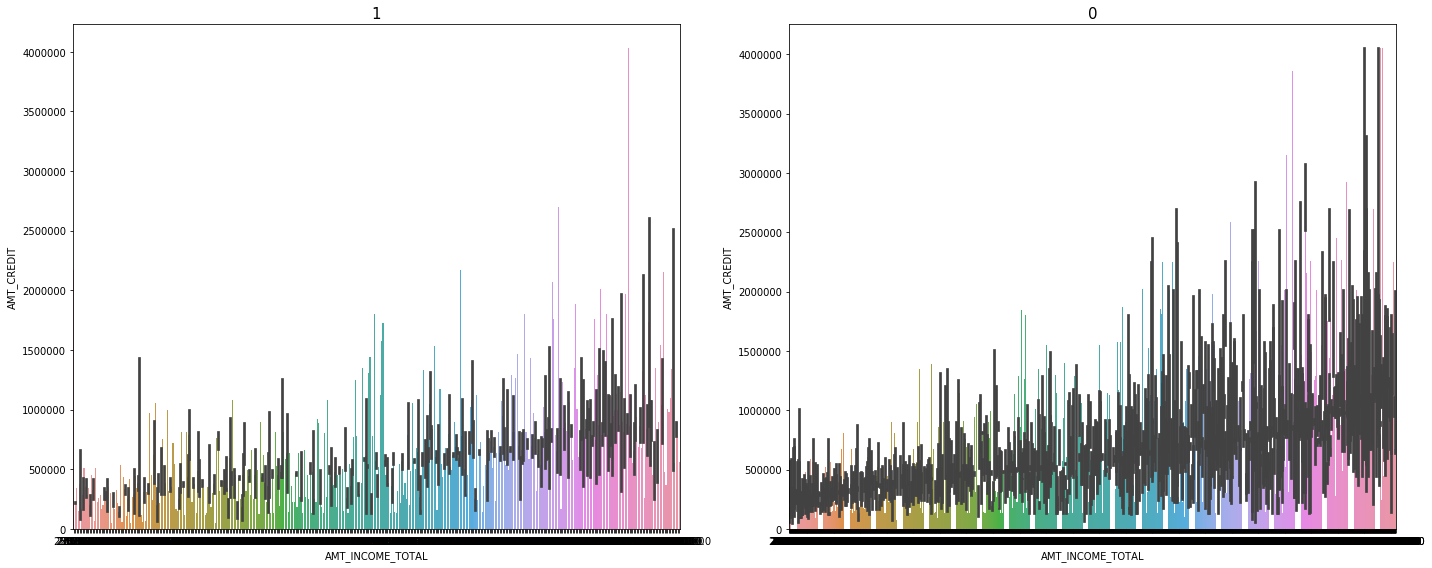

In [66]:
plt.figure(figsize=(20, 8))

# subplot 1: Sales
plt.subplot(1, 2, 1)
sns.barplot(x= App_Data_Def_DF_INCOME['AMT_INCOME_TOTAL'] ,y = App_Data_Def_DF_INCOME['AMT_CREDIT'])
plt.title("1", fontsize = 15)


# subplot 2: Profit
plt.subplot(1, 2, 2)
sns.barplot(x= App_Data_Others_DF_INCOME['AMT_INCOME_TOTAL'] ,y = App_Data_Others_DF_INCOME['AMT_CREDIT'])
plt.title("0", fontsize = 15)

plt.tight_layout()
plt.show()

<font color = red> In Case of of defaulters we can see that the Amount of Credit is much higher than the Amount of income. This can lead to repayment difficulties.

In [70]:
App_Data_DF_INCOME1=App_Data_DF_INCOME.groupby(['TARGET'])

In [71]:
App_Data_DF_INCOME2=App_Data_DF_INCOME1['AMT_INCOME_TOTAL','AMT_CREDIT'].mean()
App_Data_DF_INCOME2

,AMT_INCOME_TOTAL,AMT_CREDIT
TARGET,,
0,169077.722266,602648.282002
1,165611.760906,557778.527674


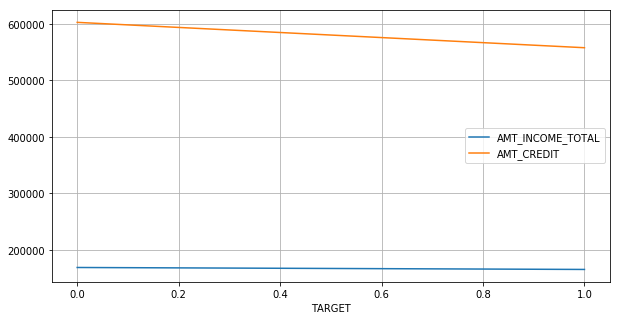

In [72]:
App_Data_DF_INCOME2.plot(figsize=(10,5), grid=True)

plt.show()

> #### Bivariate analysis with  AMT_INCOME_TOTAL as a numerical variable 0 and 1 with  AMT_ANNUITY

In [73]:
App_Data_Def_DF['AMT_ANNUITY'].describe()

count     24825.000000
mean      26481.744290
std       12450.676999
min        2722.500000
25%       17361.000000
50%       25263.000000
75%       32976.000000
max      149211.000000
Name: AMT_ANNUITY, dtype: float64

In [74]:
App_Data_Def_DF_Annuity=App_Data_Def_DF.loc[:,['AMT_INCOME_TOTAL','AMT_ANNUITY']]
App_Data_Others_DF_Annuity=App_Data_others_DF.loc[:,['AMT_INCOME_TOTAL','AMT_ANNUITY']]

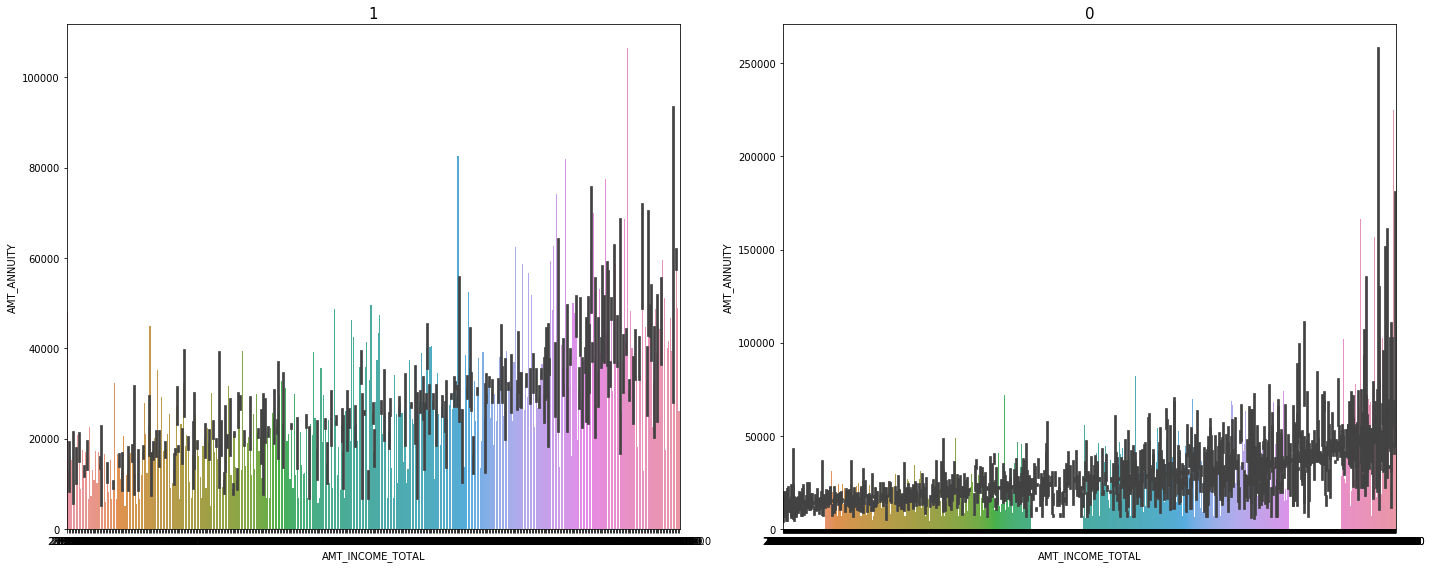

In [75]:
plt.figure(figsize=(20, 8))

# subplot 1: Sales
plt.subplot(1, 2, 1)
sns.barplot(x= App_Data_Def_DF_Annuity['AMT_INCOME_TOTAL'] ,y = App_Data_Def_DF_Annuity['AMT_ANNUITY'])
plt.title("1", fontsize = 15)


# subplot 2: Profit
plt.subplot(1, 2, 2)
sns.barplot(x= App_Data_Others_DF_Annuity['AMT_INCOME_TOTAL'] ,y = App_Data_Others_DF_Annuity['AMT_ANNUITY'])
plt.title("0", fontsize = 15)

plt.tight_layout()
plt.show()

<Font color = Red> The amount of Income of the client Vs Loan Annuity shows the clients with good income to annuity ratio has better replayment capacity than others.

In [7]:
App_Data_ANNUITY1=App_Data_ANNUITY.groupby(['TARGET'])

In [8]:
App_Data_ANNUITY2=App_Data_ANNUITY1['AMT_INCOME_TOTAL','AMT_ANNUITY']
App_Data_ANNUITY2.corr(method='pearson')

AMT_INCOME_TOTAL  AMT_ANNUITY
TARGET                                                
0      AMT_INCOME_TOTAL          1.000000     0.418953
       AMT_ANNUITY               0.418953     1.000000
1      AMT_INCOME_TOTAL          1.000000     0.046421
       AMT_ANNUITY               0.046421     1.000000

<font color = red> There is good correlation factor matrix between Loan Annuity and client's income which is 0.41 which is positive correlation matrix for people who pays loan time to time

In [9]:
App_Data_ANNUITY3=App_Data_ANNUITY1['AMT_INCOME_TOTAL','AMT_ANNUITY'].mean()
App_Data_ANNUITY3.head()

,AMT_INCOME_TOTAL,AMT_ANNUITY
TARGET,,
0,169077.722266,27163.623349
1,165611.760906,26481.744290


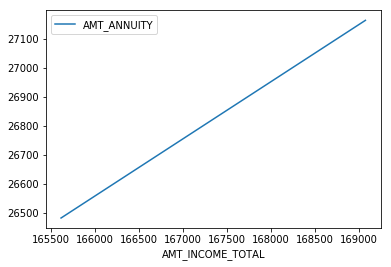

In [18]:
ax = plt.gca()
App_Data_ANNUITY3.plot(kind='line',x='AMT_INCOME_TOTAL',y='AMT_ANNUITY',ax=ax)
plt.show()

<font color = red> The conclusion that these are almost similar for both cases ,and we can derive from correlation matrix that is client's income increases and therefor loan annuity increases means failure that is shift towards 0 .
    

> ##### Bivariate analysis with  AMT_INCOME_TOTAL as a numerical variable 0 and 1 with  AMT_GOODS_PRICE

In [19]:
App_Data_GOODS=App_Data_DF.loc[:,['TARGET','AMT_INCOME_TOTAL','AMT_GOODS_PRICE']]

In [20]:
App_Data_GOODS['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [21]:
App_Data_GOODS1=App_Data_GOODS.groupby(['TARGET'])

In [22]:
App_Data_GOODS2=App_Data_GOODS1['AMT_INCOME_TOTAL','AMT_GOODS_PRICE'].mean()
App_Data_GOODS2

,AMT_INCOME_TOTAL,AMT_GOODS_PRICE
TARGET,,
0,169077.722266,542736.795003
1,165611.760906,488972.412554


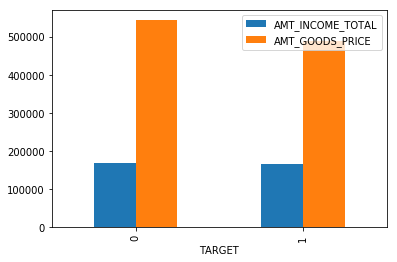

In [23]:
App_Data_GOODS2.plot(kind="bar")

plt.show()

<font color = red> The conclusion that average of client which are having high salary tend to have good repayment with consumer loans by goods prices

> #### Bivariate analysis with  AMT_CREDIT as a numerical variable 0 and 1 other AMT_ANNUITY



In [24]:
App_Data_DF_AMT=App_Data_DF.loc[:,['TARGET','AMT_CREDIT','AMT_ANNUITY']]

In [25]:
App_Data_DF_AMT2=App_Data_DF_AMT.groupby(['TARGET'])

In [26]:
App_Data_DF_AMT3=App_Data_DF_AMT2['AMT_CREDIT','AMT_ANNUITY'].mean()
App_Data_DF_AMT3

,AMT_CREDIT,AMT_ANNUITY
TARGET,,
0,602648.282002,27163.623349
1,557778.527674,26481.744290


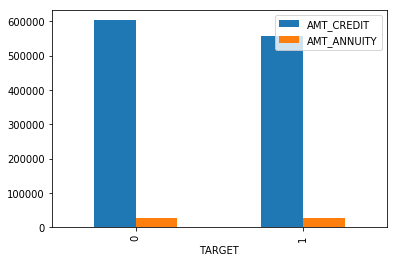

In [27]:
App_Data_DF_AMT3.plot(kind="bar")

plt.show()

### Cleaning data before finding co-relation

In [133]:
Corr_others_DF = App_Data_others_DF.loc[:,['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']]

In [130]:
Corr_Def_DF = App_Data_Def_DF.loc[:,['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']]

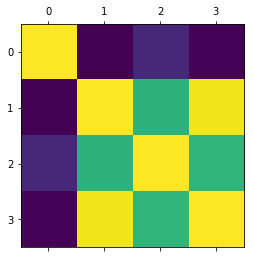

In [131]:
plt.matshow(Corr_others_DF.corr())
plt.show()

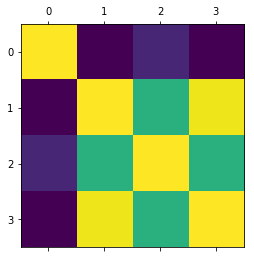

In [132]:
plt.matshow(Corr_Def_DF.corr())
plt.show()

In [140]:
Corr_others_DF2 = App_Data_others_DF.loc[:,['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']]

In [143]:
Corr_Def_DF2 = App_Data_Def_DF.loc[:,['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']]

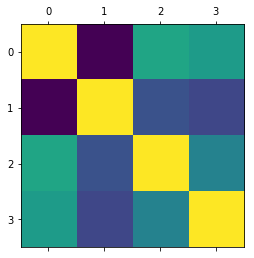

In [142]:
plt.matshow(Corr_others_DF2.corr())
plt.show()

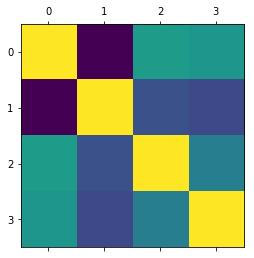

In [144]:
plt.matshow(Corr_Def_DF2.corr())
plt.show()

The co - relation of different variables for defaulter data frame and other data frame look same

In [34]:
#Loading PRevious Application Data
Pre_App_DF = pd.read_csv("C:\\Users\\Raviraj Kuber\\Documents\\IIITB\\EDA Case Study\\previous_application.csv")

# Adding Suffix to Previous data columns to make it easy for identification post data merge
Pre_App_DF.columns = [str(col) + '_prev' for col in Pre_App_DF.columns]



In [36]:
Pre_App_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV_prev                     1670214 non-null int64
SK_ID_CURR_prev                     1670214 non-null int64
NAME_CONTRACT_TYPE_prev             1670214 non-null object
AMT_ANNUITY_prev                    1297979 non-null float64
AMT_APPLICATION_prev                1670214 non-null float64
AMT_CREDIT_prev                     1670213 non-null float64
AMT_DOWN_PAYMENT_prev               774370 non-null float64
AMT_GOODS_PRICE_prev                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START_prev     1670214 non-null object
HOUR_APPR_PROCESS_START_prev        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT_prev    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY_prev         1670214 non-null int64
RATE_DOWN_PAYMENT_prev              774370 non-null float64
RATE_INTEREST_PRIMARY_prev          5951 non-null float64
RATE_INTEREST_PRIVILEGED_prev       5951 non-null

In [37]:
Pre_App_DF.describe()

,SK_ID_PREV_prev,SK_ID_CURR_prev,AMT_ANNUITY_prev,AMT_APPLICATION_prev,AMT_CREDIT_prev,AMT_DOWN_PAYMENT_prev,AMT_GOODS_PRICE_prev,HOUR_APPR_PROCESS_START_prev,NFLAG_LAST_APPL_IN_DAY_prev,RATE_DOWN_PAYMENT_prev,...,RATE_INTEREST_PRIVILEGED_prev,DAYS_DECISION_prev,SELLERPLACE_AREA_prev,CNT_PAYMENT_prev,DAYS_FIRST_DRAWING_prev,DAYS_FIRST_DUE_prev,DAYS_LAST_DUE_1ST_VERSION_prev,DAYS_LAST_DUE_prev,DAYS_TERMINATION_prev,NFLAG_INSURED_ON_APPROVAL_prev
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [38]:
#Identifying null  percentages
round(100*(Pre_App_DF.isnull().sum()/len(Pre_App_DF.index)),2)

SK_ID_PREV_prev                      0.00
SK_ID_CURR_prev                      0.00
NAME_CONTRACT_TYPE_prev              0.00
AMT_ANNUITY_prev                    22.29
AMT_APPLICATION_prev                 0.00
AMT_CREDIT_prev                      0.00
AMT_DOWN_PAYMENT_prev               53.64
AMT_GOODS_PRICE_prev                23.08
WEEKDAY_APPR_PROCESS_START_prev      0.00
HOUR_APPR_PROCESS_START_prev         0.00
FLAG_LAST_APPL_PER_CONTRACT_prev     0.00
NFLAG_LAST_APPL_IN_DAY_prev          0.00
RATE_DOWN_PAYMENT_prev              53.64
RATE_INTEREST_PRIMARY_prev          99.64
RATE_INTEREST_PRIVILEGED_prev       99.64
NAME_CASH_LOAN_PURPOSE_prev          0.00
NAME_CONTRACT_STATUS_prev            0.00
DAYS_DECISION_prev                   0.00
NAME_PAYMENT_TYPE_prev               0.00
CODE_REJECT_REASON_prev              0.00
NAME_TYPE_SUITE_prev                49.12
NAME_CLIENT_TYPE_prev                0.00
NAME_GOODS_CATEGORY_prev             0.00
NAME_PORTFOLIO_prev               

In [39]:
# Removing the column which are having greater than 50% of NaN values
Pre_App_DF=Pre_App_DF.drop("AMT_DOWN_PAYMENT_prev",axis=1)
Pre_App_DF=Pre_App_DF.drop("RATE_INTEREST_PRIMARY_prev",axis=1)
Pre_App_DF=Pre_App_DF.drop("RATE_INTEREST_PRIVILEGED_prev",axis=1)

In [40]:
# Merging  Current and Previous Application Data on Sk_Id_Curr
df_app_merge=pd.merge(App_Data_DF,Pre_App_DF,left_on='SK_ID_CURR',right_on='SK_ID_CURR_prev')

### Univariate Analysis of NAME_CONTRACT_TYPE

In [41]:
### Univariate Analysis on NAME_CONTRACT_TYPE
Pre_App_DF_CON = Pre_App_DF.loc[:,['SK_ID_CURR_prev','NAME_CONTRACT_TYPE_prev']]
(Pre_App_DF_CON.groupby('NAME_CONTRACT_TYPE_prev').count()/len(Pre_App_DF_CON))*100

,SK_ID_CURR_prev
NAME_CONTRACT_TYPE_prev,
Cash loans,44.757917
Consumer loans,43.656142
Revolving loans,11.565225
XNA,0.020716


**From Above analysis,44.75% contract are of Cash and 43.65 are consumer loans which is most people prefer because it may get approved but we can't tell now** 


### Bivariate Analysis with NAME_CONTRACT_TYPE and NAME_CONTRACT_STATUS 


In [42]:
Pre_App_STAT = Pre_App_DF.loc[:,['SK_ID_CURR_prev','NAME_CONTRACT_TYPE_prev','NAME_CONTRACT_STATUS_prev']]

(Pre_App_STAT.groupby(['NAME_CONTRACT_STATUS_prev','NAME_CONTRACT_TYPE_prev']).count()/len(Pre_App_STAT))*100

SK_ID_CURR_prev
NAME_CONTRACT_STATUS_prev NAME_CONTRACT_TYPE_prev                 
Approved                  Cash loans                     18.712572
                          Consumer loans                 37.508367
                          Revolving loans                 5.853801
Canceled                  Cash loans                     16.081233
                          Consumer loans                  0.093341
                          Revolving loans                 2.745397
                          XNA                             0.018860
Refused                   Cash loans                      9.934535
                          Consumer loans                  4.501519
                          Revolving loans                 2.965728
                          XNA                             0.001856
Unused offer              Cash loans                      0.029577
                          Consumer loans                  1.552915
                          Revolving loans                 0.000299

***From above,44.75% contract are of Cash and 43.65 are consumer loans which is most people prefer but approval rate is higher for Consumer Loans and loans which are canceled by client are mostly client with cash loans** 

#### Here we are removing outliers from 3 Numerical variables like AMT_CREDIT ,AMT_ANNUITY ,AMT_APPLICATION 

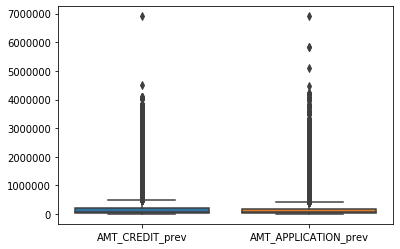

In [43]:
Pre_App_DF_AMT=Pre_App_DF.loc[:,['AMT_CREDIT_prev','AMT_APPLICATION_prev']]
sns.boxplot(data=Pre_App_DF_AMT)

##### AS you can see from boxplots there are lot of outliers in 3 of Numerical variable we will be removing them by using The interquartile range (IQR), also called the midspread or middle 50%

In [45]:
Q1 = Pre_App_DF_AMT.quantile(0.5)
Q3 = Pre_App_DF_AMT.quantile(0.95)
IQR = Q3 - Q1
Pre_App_AMT_out = Pre_App_DF_AMT[~((Pre_App_DF_AMT < (Q1 - 1.5 * IQR)) |(Pre_App_DF_AMT > (Q3 + 1.5 * IQR))).any(axis=1)]
Pre_App_AMT_out.shape

(1664903, 2)

In [46]:
Pre_App_AMT_out.head()

,AMT_CREDIT_prev,AMT_APPLICATION_prev
0,17145.0,17145.0
1,679671.0,607500.0
2,136444.5,112500.0
3,470790.0,450000.0
4,404055.0,337500.0


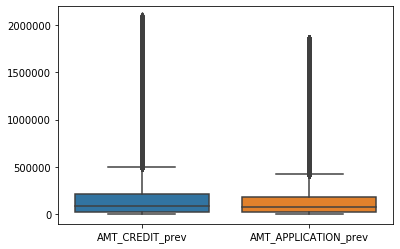

In [47]:
sns.boxplot(data=Pre_App_AMT_out)

#### AS you can see from boxplots we have removed most of the outliers so we can do statistical analysis 

In [48]:
corre=Pre_App_AMT_out.corr(method='pearson')
corre

,AMT_CREDIT_prev,AMT_APPLICATION_prev
AMT_CREDIT_prev,1.000000,0.972082
AMT_APPLICATION_prev,0.972082,1.000000


#### AS you can see from There is Positive correlation matrix between this two

###  Bivariate anaylysis with Numerical varible vs Continous Variable

In [49]:
Pre_App_AMT_out1 = pd.concat([Pre_App_DF.loc[:,'NAME_CONTRACT_STATUS_prev'], Pre_App_AMT_out], axis=1)
Pre_App_AMT_out2=Pre_App_AMT_out1.dropna()
Pre_App_AMT_out2.index = pd.RangeIndex(len(Pre_App_AMT_out2.index))
Pre_App_AMT_out2.head()

,NAME_CONTRACT_STATUS_prev,AMT_CREDIT_prev,AMT_APPLICATION_prev
0,Approved,17145.0,17145.0
1,Approved,679671.0,607500.0
2,Approved,136444.5,112500.0
3,Approved,470790.0,450000.0
4,Refused,404055.0,337500.0


In [50]:
Pre_App_AMT_out3=Pre_App_AMT_out2.groupby(['NAME_CONTRACT_STATUS_prev'])
Pre_App_AMT_out3.head()

,NAME_CONTRACT_STATUS_prev,AMT_CREDIT_prev,AMT_APPLICATION_prev
0,Approved,17145.0,17145.0
1,Approved,679671.0,607500.0
2,Approved,136444.5,112500.0
3,Approved,470790.0,450000.0
4,Refused,404055.0,337500.0
5,Approved,340573.5,315000.0
6,Canceled,0.0,0.0
7,Canceled,0.0,0.0
8,Canceled,0.0,0.0
9,Canceled,0.0,0.0


In [51]:
Pre_App_AMT_out4=Pre_App_AMT_out3['AMT_CREDIT_prev','AMT_APPLICATION_prev'].mean()
Pre_App_AMT_out4.head()

,AMT_CREDIT_prev,AMT_APPLICATION_prev
NAME_CONTRACT_STATUS_prev,,
Approved,199126.299875,177256.080962
Canceled,21771.178666,20396.190824
Refused,347508.275658,309023.691949
Unused offer,69547.710857,69524.451267


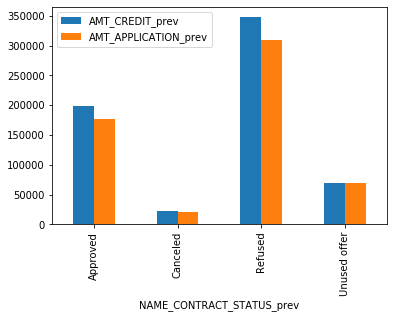

In [52]:
Pre_App_AMT_out4.plot(kind="bar")

plt.show()

#### Refused rate is greater for greater final loan amount but approval rate is moderate for average Loan Amount